In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [5]:
dtype = {
    'ResponseID': 'category',
    'UserID': 'int8',
    'Intervention': 'int8',
    'PedPed': 'int8',
    'Barrier': 'int8',
    'CrossingSignal': 'int8',
    'AttributeLevel': 'category',
    'ScenarioTypeStrict': 'category',
    'NumberOfCharacters': 'int8',
    'DiffNumberOFCharacters': 'int8',
    'Saved': 'int8',
    'Man': 'int8',
    'Woman': 'int8',
    'Pregnant': 'int8',
    'Stroller': 'int8',
    'OldMan': 'int8',
    'OldWoman': 'int8',
    'Boy': 'int8',
    'Girl': 'int8',
    'Homeless': 'int8',
    'LargeWoman': 'int8',
    'LargeMan': 'int8',
    'Criminal': 'int8',
    'MaleExecutive': 'int8',
    'FemaleExecutive': 'int8',
    'FemaleAthlete': 'int8',
    'MaleAthlete': 'int8',
    'FemaleDoctor': 'int8',
    'MaleDoctor': 'int8',
    'Dog': 'int8',
    'Cat': 'int8'
}


In [6]:
# load data

df98 = pd.read_csv('total_98_dataset.csv', dtype=dtype)

In [7]:
df98.shape

(2500000, 31)

In [8]:
df98.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_01656117,0,0,0,1,0,Fit,Fitness,5,0,...,0,0,0,0,2,0,0,0,0,0
1,res_01622131,0,1,1,0,0,Hoomans,Species,1,0,...,0,0,0,0,0,0,0,0,0,0
2,res_00961514,0,1,0,0,2,Young,Age,5,0,...,0,0,0,0,0,0,0,0,0,0
3,res_01131621,0,1,0,0,2,Young,Age,5,0,...,0,0,0,0,0,0,0,0,0,0
4,res_01126571,0,1,0,0,1,Female,Gender,3,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
df98['UserID'].value_counts()

UserID
0    2450000
1      50000
Name: count, dtype: int64

In [10]:
# checking how many different categories are in the categorical columns
print(len(df98['AttributeLevel'].value_counts()))
print(len(df98['ScenarioTypeStrict'].value_counts()))


12
6


In [11]:
# with one hot encoding, this means that there will be 17 (!) extra columns

In [12]:
# preprocessing

# one-hot encode the AttributeLevel and ScenarioTypeStrict
df98 = pd.get_dummies(df98, columns=['AttributeLevel', 'ScenarioTypeStrict'])
print(df98.columns)


Index(['ResponseID', 'UserID', 'Intervention', 'PedPed', 'Barrier',
       'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters',
       'Saved', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman',
       'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal',
       'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete',
       'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'AttributeLevel_Fat',
       'AttributeLevel_Female', 'AttributeLevel_Fit', 'AttributeLevel_High',
       'AttributeLevel_Hoomans', 'AttributeLevel_Less', 'AttributeLevel_Low',
       'AttributeLevel_Male', 'AttributeLevel_More', 'AttributeLevel_Old',
       'AttributeLevel_Pets', 'AttributeLevel_Young', 'ScenarioTypeStrict_Age',
       'ScenarioTypeStrict_Fitness', 'ScenarioTypeStrict_Gender',
       'ScenarioTypeStrict_Social Status', 'ScenarioTypeStrict_Species',
       'ScenarioTypeStrict_Utilitarian'],
      dtype='object')


In [13]:
df98.dtypes

ResponseID                          category
UserID                                  int8
Intervention                            int8
PedPed                                  int8
Barrier                                 int8
CrossingSignal                          int8
NumberOfCharacters                      int8
DiffNumberOFCharacters                  int8
Saved                                   int8
Man                                     int8
Woman                                   int8
Pregnant                                int8
Stroller                                int8
OldMan                                  int8
OldWoman                                int8
Boy                                     int8
Girl                                    int8
Homeless                                int8
LargeWoman                              int8
LargeMan                                int8
Criminal                                int8
MaleExecutive                           int8
FemaleExec

### Splitting

In [14]:
# Prepare features and target variable
X = df98.drop(['UserID', 'ResponseID'], axis=1)     # Features
y = df98['UserID']                                  # Target variable

In [15]:
# Split the data into train, validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.111111111111, random_state=42)

In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2000000, 45)
(250000, 45)
(250000, 45)


### Logistic Regression

In [16]:
# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Make predictions
y_pred_lr = lr_model.predict(X_val)

In [18]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_val, y_pred_lr))

Accuracy: 0.980148


In [19]:
cm = confusion_matrix(y_val, y_pred_lr)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[245020      0]
 [  4963     17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    245020
           1       1.00      0.00      0.01      4980

    accuracy                           0.98    250000
   macro avg       0.99      0.50      0.50    250000
weighted avg       0.98      0.98      0.97    250000



### Logistic Regression with K-fold (TESTS!)

In [97]:
lr_model = LogisticRegression()

# Set the number of folds
k = 5  # or any other value you want for k-fold cross-validation

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Perform cross-validation and calculate accuracy for each fold
accuracies = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='accuracy')

# Display accuracy for each fold and the mean accuracy
print("Accuracies for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracies for each fold: [0.98011    0.98010125 0.9798625  0.9800275  0.97987875]
Mean accuracy: 0.9799960000000001


In [60]:
# Define the model
model = LogisticRegression()

In [65]:
# Define the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1]}

# Create the GridSearchCV object
cv_object = RandomizedSearchCV(estimator=model, 
                          param_distributions=param_grid, 
                          scoring='accuracy', 
                          cv=3,  # 3-fold cross-validation
                          verbose=1,
                          return_train_score=True)

# Fit the model using GridSearchCV
cv_object.fit(X_train, y_train)

# Now you have a cv_object that contains all necessary information
print("Best Parameters:", cv_object.best_params_)
print("Best Cross-Validation Score:", cv_object.best_score_)

c:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.9799964999986225


In [68]:
best_model = cv_object.best_estimator_
y_pred = best_model.predict(X)

# Print accuracy on the whole dataset
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the training set: {accuracy:}")

# Display accuracies per fold
cv_results = cv_object.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

Accuracy on the training set: 0.980026


In [69]:
results_df = pd.DataFrame({
    'Parameters': params,
    'Mean Accuracy': mean_test_scores,
    'Standard Deviation': std_test_scores
})

# Display the results DataFrame
print("\nCross-Validation Results:")
print(results_df)


Cross-Validation Results:
    Parameters  Mean Accuracy  Standard Deviation
0  {'C': 0.01}       0.979992            0.000007
1   {'C': 0.1}       0.979996            0.000008
2     {'C': 1}       0.979996            0.000008


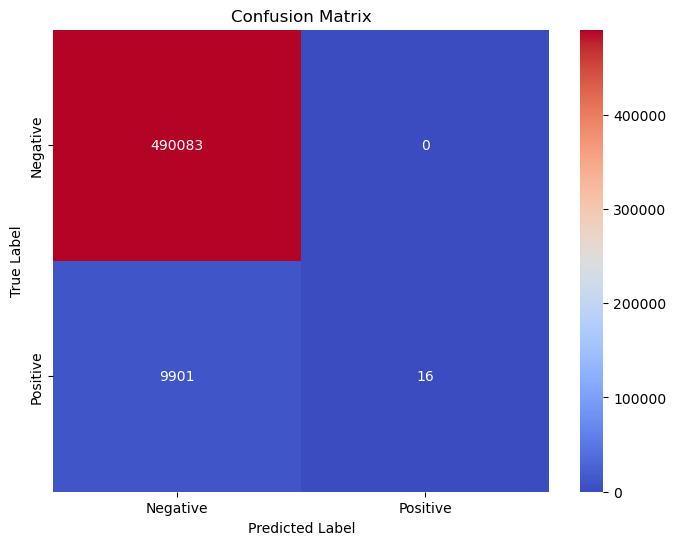

In [66]:
# Make predictions with the best estimator
y_pred = cv_object.best_estimator_.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm',
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)


In [28]:
# Evaluate the model - without k-fold
# print('Accuracy:', accuracy_score(y_val, y_pred_lr))

Accuracy: 0.980092


In [29]:
# cm = confusion_matrix(y_val, y_pred_lr)
# print('Confusion Matrix:')
# print(cm)

# print('Classification Report:')
# print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[490036      0]
 [  9954     10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    490036
           1       1.00      0.00      0.00      9964

    accuracy                           0.98    500000
   macro avg       0.99      0.50      0.50    500000
weighted avg       0.98      0.98      0.97    500000



In [20]:
# zonder responseID doet ie het beter dan zonder
# met 97999 dus slechter dan alleen 0 gokken
# zonder 98296, wat wat beter is dan alleen 0 gokken

# beide op de validation set!

# op test set deed ie het nog wat beter vm

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store true labels and predictions
y_true = []
y_pred = []
fold_accuracies = []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred_fold = model.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy_fold = accuracy_score(y_test, y_pred_fold)
    fold_accuracies.append(accuracy_fold)
    
    # Append the results
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    
    print(f'Fold {fold + 1} Accuracy: {accuracy_fold:.4f}')

# Convert lists to numpy arrays for easier manipulation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

Fold 1 Accuracy: 0.9800
Fold 2 Accuracy: 0.9802
Fold 3 Accuracy: 0.9799
Fold 4 Accuracy: 0.9801
Fold 5 Accuracy: 0.9800


In [85]:
# Print the overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall Accuracy: {accuracy:}')

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

Overall Accuracy: 0.980029
Confusion Matrix:
[[4900000       0]
 [  99855     145]]


In [87]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99   4900000
           1       1.00      0.00      0.00    100000

    accuracy                           0.98   5000000
   macro avg       0.99      0.50      0.50   5000000
weighted avg       0.98      0.98      0.97   5000000



### Logistic Regression with K-fold (like the others)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store results
conf_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split data into train and test for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test)
    
    # Generate confusion matrix and classification report
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

In [21]:
# Display results
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports[i].items():
        print(f"{label}: {metrics}")


Fold 1
Confusion Matrix:
[[490063      0]
 [  9920     17]]

Classification Report:
0: {'precision': 0.9801593254170642, 'recall': 1.0, 'f1-score': 0.9899802635433101, 'support': 490063.0}
1: {'precision': 1.0, 'recall': 0.0017107779007748817, 'f1-score': 0.00341571227647177, 'support': 9937.0}
accuracy: 0.98016
macro avg: {'precision': 0.9900796627085321, 'recall': 0.5008553889503874, 'f1-score': 0.49669798790989095, 'support': 500000.0}
weighted avg: {'precision': 0.9805536389837255, 'recall': 0.98016, 'f1-score': 0.970373279651433, 'support': 500000.0}

Fold 2
Confusion Matrix:
[[489971      0]
 [  9997     32]]

Classification Report:
0: {'precision': 0.9800047203020993, 'recall': 1.0, 'f1-score': 0.9899013979649252, 'support': 489971.0}
1: {'precision': 1.0, 'recall': 0.0031907468341808754, 'f1-score': 0.006361196700129212, 'support': 10029.0}
accuracy: 0.980006
macro avg: {'precision': 0.9900023601510497, 'recall': 0.5015953734170905, 'f1-score': 0.4981312973325272, 'support': 5

In [22]:
# Calculate average accuracy
accuracies = [report['accuracy'] for report in classification_reports]
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy}")

# Caluculate average standard deviation
std_dev = np.std(accuracies)
print(f"Standard Deviation: {std_dev}")


Average Accuracy: 0.9800456000000001
Standard Deviation: 7.46125994722328e-05


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_val)

In [25]:
# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {accuracy_rf:}')

Accuracy: 0.985532


In [26]:
# Confusion matrix
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_val, y_pred_rf)
print("Classification Report:\n", class_report_rf)

Confusion Matrix:
 [[244956     64]
 [  3553   1427]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    245020
           1       0.96      0.29      0.44      4980

    accuracy                           0.99    250000
   macro avg       0.97      0.64      0.72    250000
weighted avg       0.99      0.99      0.98    250000



### Random Forest with K-fold

In [15]:
### Random Forest with K-fold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model_k = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up K-Fold Cross Validation (e.g., K=5)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store results
conf_matrices_rf = []
classification_reports_rf = []

# Manually loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf_model_k.fit(X_train, y_train)
    
    # Make predictions
    y_pred_rf = rf_model_k.predict(X_test)
    
    # Store confusion matrix and classification report for each fold
    conf_matrices_rf.append(confusion_matrix(y_test, y_pred_rf))
    classification_reports_rf.append(classification_report(y_test, y_pred_rf, output_dict=True))

    print("Done processing a fold")

Done processing a fold
Done processing a fold
Done processing a fold
Done processing a fold
Done processing a fold


In [16]:
# Display results for each fold
for i in range(k):
    print(f"\nFold {i+1}")
    print("Confusion Matrix:")
    print(conf_matrices_rf[i])
    print("\nClassification Report:")
    for label, metrics in classification_reports_rf[i].items():
        print(f"{label}: {metrics}")


Fold 1
Confusion Matrix:
[[489705    358]
 [  7699   2238]]

Classification Report:
0: {'precision': 0.9845216363358558, 'recall': 0.9992694816788862, 'f1-score': 0.9918407399943492, 'support': 490063.0}
1: {'precision': 0.862095531587057, 'recall': 0.22521887893730502, 'f1-score': 0.3571371579031357, 'support': 9937.0}
accuracy: 0.983886
macro avg: {'precision': 0.9233085839614563, 'recall': 0.6122441803080956, 'f1-score': 0.6744889489487425, 'support': 500000.0}
weighted avg: {'precision': 0.9820885399300782, 'recall': 0.983886, 'f1-score': 0.9792266410038684, 'support': 500000.0}

Fold 2
Confusion Matrix:
[[489603    368]
 [  7739   2290]]

Classification Report:
0: {'precision': 0.9844392792082711, 'recall': 0.9992489351410594, 'f1-score': 0.9917888248204977, 'support': 489971.0}
1: {'precision': 0.8615500376222723, 'recall': 0.2283378203210689, 'f1-score': 0.3609994482541184, 'support': 10029.0}
accuracy: 0.983786
macro avg: {'precision': 0.9229946584152717, 'recall': 0.613793377

In [17]:
# Calculate average accuracy
accuracies_rf = [report['accuracy'] for report in classification_reports_rf]
average_accuracy_rf = np.mean(accuracies_rf)
print(f"\nAverage Accuracy RF: {average_accuracy_rf}")

# Caluculate average standard deviation
std_dev_rf = np.std(accuracies_rf)
print(f"Standard Deviation: {std_dev_rf}")


Average Accuracy RF: 0.9838772
Standard Deviation: 0.00014224823373241822


In [29]:
import numpy as np

# Collect the recall for the '1.0' class from each fold
recall_class_1 = [report['1']['recall'] for report in classification_reports_rf]

# Calculate the average recall for the '1.0' class across all folds
average_recall_class_1 = np.mean(recall_class_1)
print(f"\nAverage Recall for class 1.0: {average_recall_class_1}")



Average Recall for class 1.0: 0.22804136236409178


### Random Forest with Random Search

In [13]:
from scipy.stats import randint, uniform  # For defining distributions for random search

param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest (uniform distribution between 50 and 200)
    'max_depth': [None] + list(randint(1, 30).rvs(10)),  # Random depth values including None
    'min_samples_split': randint(2, 10),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 4)  # Minimum samples required to be at a leaf node
}

In [14]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model_search = RandomForestClassifier(random_state=42)  # Random state for reproducibility

In [ ]:
# Set up K-Fold Cross Validation
k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Set up GridSearchCV
random_search = RandomizedSearchCV(estimator=rf_model_search,
                           param_distributions=param_dist,
                           n_iter=20,          # Number of parameter settings that are sampled
                           scoring='accuracy',
                           cv=k,
                           verbose=2,
                           n_jobs=-1)          # Use all available cores

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
y_pred_rf_random = random_search.predict(X_val)

print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred_rf_random))
print(confusion_matrix(y_val, y_pred_rf_random))
print(classification_report(y_val, y_pred_rf_random))

NameError: name 'random_search' is not defined

### Random Forest - Stratified K-fold cross validation 

In [16]:
# Stratified k-fold for to handle the big class imbalance in this dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up Stratified K-Fold Cross-Validation
k = 3  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation
scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)

# Print results
print("Stratified Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Stratified Cross-Validation Accuracy Scores: [0.98367551 0.98361701 0.98386148]
Mean Accuracy: 0.9837180000717419
Standard Deviation: 0.00010423134552036317


### SVM on a subset

In [23]:
# creating a subset to test the model

df98_subset = df98.sample(frac=0.05, random_state=42)
df98_subset.shape

(125000, 47)

In [24]:
# Prepare features and target variable
X_sub = df98_subset.drop(['UserID', 'ResponseID'], axis=1)    # Features
y_sub = df98_subset['UserID']                                 # Target variable

# Split the data into train, validation and test sets
X_trainval_sub, X_test_sub, y_trainval_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.1, random_state=42)
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_trainval_sub, y_trainval_sub, test_size=0.111111111111, random_state=42)

In [25]:
from sklearn.svm import SVC

# Define custom class weights
class_weights = {0: 1, 1: 15}  # Give higher weight to class 1 (minority class)

# Initialize SVC with custom class weights
svc = SVC(kernel='rbf', class_weight=class_weights, random_state=45)

# choosing rbf cause not linearly separable

In [26]:
# Train the model
svc.fit(X_train_sub, y_train_sub)
# Make predictions on the test data
y_pred_svm = svc.predict(X_val_sub)

In [27]:
# Evaluate the model
accuracy_svm = accuracy_score(y_val_sub, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')
# Confusion matrix
conf_matrix = confusion_matrix(y_val_sub, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_val_sub, y_pred_svm)
print("Classification Report:\n", class_report)

Accuracy: 0.98032
Confusion Matrix:
 [[12200    43]
 [  203    54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12243
           1       0.56      0.21      0.31       257

    accuracy                           0.98     12500
   macro avg       0.77      0.60      0.65     12500
weighted avg       0.97      0.98      0.98     12500



### Isolation forest

In [137]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest model to detect anomalies (positive class treated as anomaly)
model_isolation = IsolationForest(contamination=0.1)
model_isolation.fit(X_train)

# Predict on test set (-1 is anomaly, 1 is normal)
y_pred_isolation = model_isolation.predict(X_test)

# Map predictions (-1 = positive class, 1 = negative class)
y_pred_isolation = [0 if x == 1 else 1 for x in y_pred_isolation]

# Confusion matrix to evaluate True Negatives
cm = confusion_matrix(y_test, y_pred_isolation)
print(cm)

[[441108  48975]
 [  9018    899]]


In [139]:
print('Accuracy:', accuracy_score(y_val, y_pred_isolation))

# Classification report
class_report = classification_report(y_test, y_pred_isolation)
print("Classification Report:\n", class_report)

Accuracy: 0.884476
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94    490083
           1       0.02      0.09      0.03      9917

    accuracy                           0.88    500000
   macro avg       0.50      0.50      0.48    500000
weighted avg       0.96      0.88      0.92    500000



### MLP

In [34]:
from tensorflow.keras import layers, optimizers, models, callbacks

learning_rate = 5e-4

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [35]:
X_mlp = np.array(X, dtype=np.float32)  # Convert features to float32
y_mlp = np.array(y, dtype=np.float32)
X_val_mlp = np.array(X_val, dtype=np.float32)
y_val_mlp = np.array(y_val, dtype=np.float32)

In [36]:
model_mlp = build_model()
history_mlp = model_mlp.fit(X_mlp, y_mlp, epochs=10, batch_size=64, validation_data=(X_val_mlp, y_val_mlp), verbose=1)

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - accuracy: 0.9766 - loss: 0.1026 - val_accuracy: 0.9840 - val_loss: 0.0795
Epoch 2/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - accuracy: 0.9840 - loss: 0.0796 - val_accuracy: 0.9841 - val_loss: 0.0785
Epoch 3/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - accuracy: 0.9840 - loss: 0.0791 - val_accuracy: 0.9841 - val_loss: 0.0782
Epoch 4/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.9841 - loss: 0.0787 - val_accuracy: 0.9840 - val_loss: 0.0782
Epoch 5/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9842 - loss: 0.0780 - val_accuracy: 0.9841 - val_loss: 0.0781
Epoch 6/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 184s 5ms/step - accuracy: 0.9840 - loss: 0.0784 - val_accuracy: 0.9841 - val_loss: 0.0778
Epoch 7/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 189s 5ms/step - accuracy: 0.9841 - loss: 0.0780 - val_accuracy: 0.9841 - val_loss: 0.0777
Epoch 8/10
39063/39063 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - accuracy

In [37]:
# evaluate the model

val_loss, val_accuracy = model_mlp.evaluate(X_val_mlp, y_val_mlp)

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9842 - loss: 0.0775


In [38]:
# confusion matrix

y_pred_mlp = model_mlp.predict(X_val_mlp)
y_pred_mlp = (y_pred_mlp > 0.5)
np.concatenate((y_pred_mlp.reshape(len(y_pred_mlp),1), y_val_mlp.reshape(len(y_val_mlp),1)),1)

cm_mlp = confusion_matrix(y_val_mlp, y_pred_mlp)
print(cm_mlp)

# classification report

print(classification_report(y_val_mlp, y_pred_mlp))

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
[[245007     13]
 [  3975   1005]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    245020
         1.0       0.99      0.20      0.34      4980

    accuracy                           0.98    250000
   macro avg       0.99      0.60      0.66    250000
weighted avg       0.98      0.98      0.98    250000



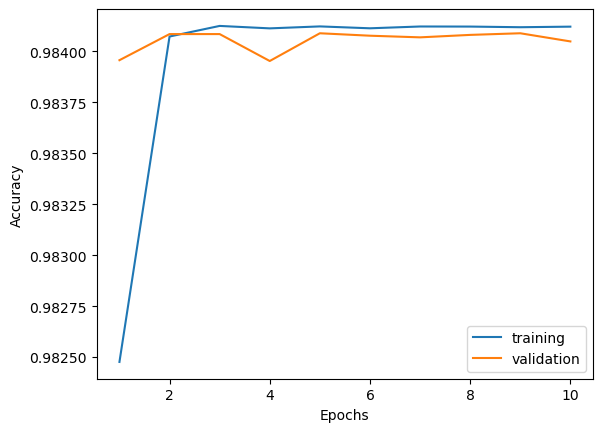

In [39]:
# plot to visualize training and validation accuracy


acc_history = history_mlp.history['accuracy']
val_acc_history = history_mlp.history['val_accuracy']

plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

### MLP with K-fold

In [30]:
import numpy as np
from tensorflow.keras import layers, optimizers, models
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

# Define parameters
learning_rate = 5e-4
n_splits = 3  # Number of folds

# Function to build the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
# Convert data to float32 (required by TensorFlow)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Set up K-Fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1

# Lists to store results
conf_matrices_mlp = []
classification_reports_mlp = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    print(f"\nFold {fold}")
    
    # Split data into training and testing for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Build and train the model
    model = build_model()
    model.fit(X_train, y_train, epochs=7, batch_size=32, verbose=1)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class predictions
    
    # Calculate confusion matrix and classification report
    cm_mlp = confusion_matrix(y_test, y_pred)
    report_mlp = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    conf_matrices_mlp.append(cm_mlp)
    classification_reports_mlp.append(report_mlp)
    
    # Print results for the current fold
    print("Confusion Matrix:")
    print(cm_mlp)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    fold += 1

# Optional: Calculate and print average metrics across all folds if needed



Fold 1


c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 73s 1ms/step - accuracy: 0.9769 - loss: 0.1016
Epoch 2/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step - accuracy: 0.9840 - loss: 0.0796
Epoch 3/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step - accuracy: 0.9840 - loss: 0.0791
Epoch 4/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 74s 1ms/step - accuracy: 0.9841 - loss: 0.0787
Epoch 5/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - accuracy: 0.9840 - loss: 0.0791
Epoch 6/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 181s 3ms/step - accuracy: 0.9841 - loss: 0.0788
Epoch 7/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 903s 17ms/step - accuracy: 0.9841 - loss: 0.0783
26042/26042 ━━━━━━━━━━━━━━━━━━━━ 22s 846us/step
Confusion Matrix:
[[816516    172]
 [ 13126   3520]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    816688
         1.0       0.95      0.21      0.35     16646

    accuracy                           0.98    833334
   macro avg       0.97 

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.9767 - loss: 0.1019
Epoch 2/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.9837 - loss: 0.0811
Epoch 3/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9840 - loss: 0.0796
Epoch 4/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.9842 - loss: 0.0781
Epoch 5/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.9842 - loss: 0.0782
Epoch 6/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - accuracy: 0.9840 - loss: 0.0789
Epoch 7/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 487s 9ms/step - accuracy: 0.9843 - loss: 0.0776
26042/26042 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step
Confusion Matrix:
[[816531     65]
 [ 13175   3562]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    816596
         1.0       0.98      0.21      0.35     16737

    accuracy                           0.98    833333
   macro avg       0.98      0.61     

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52084/52084 ━━━━━━━━━━━━━━━━━━━━ 149s 3ms/step - accuracy: 0.9768 - loss: 0.1020
Epoch 2/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 17649s 339ms/step - accuracy: 0.9838 - loss: 0.0804
Epoch 3/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 250s 5ms/step - accuracy: 0.9841 - loss: 0.0790
Epoch 4/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 212s 4ms/step - accuracy: 0.9841 - loss: 0.0787
Epoch 5/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 192s 4ms/step - accuracy: 0.9841 - loss: 0.0785
Epoch 6/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 194s 4ms/step - accuracy: 0.9839 - loss: 0.0792
Epoch 7/7
52084/52084 ━━━━━━━━━━━━━━━━━━━━ 185s 4ms/step - accuracy: 0.9840 - loss: 0.0789
26042/26042 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step
Confusion Matrix:
[[816674     42]
 [ 13068   3549]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    816716
         1.0       0.99      0.21      0.35     16617

    accuracy                           0.98    833333
   macro avg       0.99     

In [32]:
# Calculate average accuracy
accuracies_mlp = [report_mlp['accuracy'] for report_mlp in classification_reports_mlp]
average_accuracy_mlp = np.mean(accuracies_mlp)
print(f"\nAverage Accuracy: {average_accuracy_mlp}")

# Caluculate average standard deviation
std_dev_mlp= np.std(accuracies_mlp)
print(f"Standard Deviation: {std_dev_mlp}")


Average Accuracy: 0.9841408000393549
Standard Deviation: 9.431877340725262e-05


In [33]:
import numpy as np

# Collect the recall for the '1.0' class from each fold
recall_class_1 = [report_mlp['1.0']['recall'] for report_mlp in classification_reports_mlp]

# Calculate the average recall for the '1.0' class across all folds
average_recall_class_1 = np.mean(recall_class_1)
print(f"\nAverage Recall for class 1.0: {average_recall_class_1}")



Average Recall for class 1.0: 0.21262018753534995
